# 株式市場のデータ解析

In [86]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み込む
# from pandas_datareader.data import DataReader
from pandas_datareader import data
# import pandas_datareader.data as web
import quandl

# 日付と時刻を扱う
from datetime import datetime

In [88]:
# ハイテク企業
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# 直近1年のデータを扱う
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# それぞれの企業のごとに，Yahooのサイトから取得する
# for stock in tech_list:
#     globals()[stock] = data.DataReader(stock, 'yahoo', start, end)
for stock in tech_list:   
    globals()[stock] = quandl.get('WIKI/{}'.format(stock), 
                                  start_date=start, end_date=end)

In [89]:
# データの概観を掴むことができる。
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,156.409307,157.480395,155.263461,156.447625,2.778854e+07,0.005060,1.0,155.999344,157.067961,154.855933,156.037354,2.778854e+07
std,11.801712,11.953706,11.658445,11.798350,1.193571e+07,0.056348,0.0,12.195830,12.351609,12.045626,12.190586,1.193571e+07
min,135.910000,136.660000,135.280000,136.530000,1.394898e+07,0.000000,1.0,134.809110,135.553035,134.184213,135.424088,1.394898e+07
25%,145.130000,146.180000,144.270000,145.630000,2.021931e+07,0.000000,1.0,144.424007,145.589279,143.258735,145.041502,2.021931e+07
50%,155.810000,156.650000,154.560000,155.470000,2.450716e+07,0.000000,1.0,155.379555,156.016969,154.050000,155.300000,2.450716e+07
75%,167.165000,168.500000,165.610000,167.430000,3.144913e+07,0.000000,1.0,167.165000,168.500000,165.610000,167.430000,3.144913e+07
max,179.370000,180.100000,178.250000,179.260000,8.543608e+07,0.630000,1.0,179.370000,180.100000,178.250000,179.260000,8.543608e+07


In [90]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2017-02-21 to 2018-02-16
Data columns (total 12 columns):
Open           249 non-null float64
High           249 non-null float64
Low            249 non-null float64
Close          249 non-null float64
Volume         249 non-null float64
Ex-Dividend    249 non-null float64
Split Ratio    249 non-null float64
Adj. Open      249 non-null float64
Adj. High      249 non-null float64
Adj. Low       249 non-null float64
Adj. Close     249 non-null float64
Adj. Volume    249 non-null float64
dtypes: float64(12)
memory usage: 25.3 KB


出来高と終値をプロットしてみる。

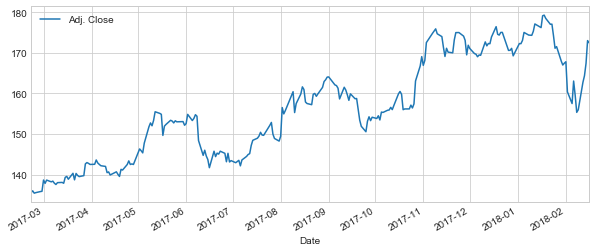

In [92]:
# 終値の時系列をプロットしてみる。
AAPL['Adj. Close'].plot(legend = True, figsize = (10, 4))

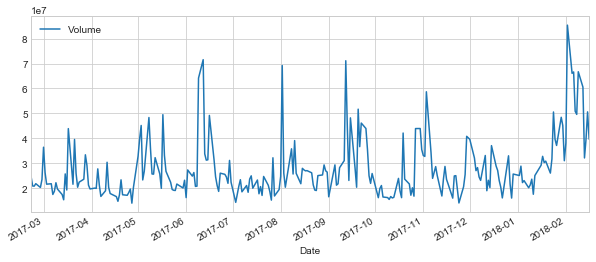

In [93]:
# 出来高(1日に取引が成立した株の数)をプロットする。
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

移動平均線(moving average)と呼ばれるグラフを描く
参考資料

1.) https://ja.wikipedia.org/wiki/%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [111]:
# pandasの機能はいろいろある

# リストの間隔毎に移動平均を描く
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj. Close'], ma)
    # AAPL[column_name] = Series.rolling(center=False,window=10).mean()

/Users/usui/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/Users/usui/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/Users/usui/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


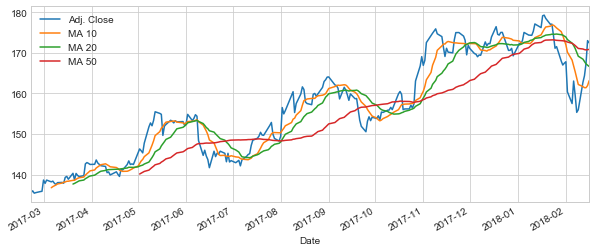

In [112]:
AAPL[['Adj. Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots = False, figsize = (10, 4))

### Section2 - 株価と日ごとの変動

株式投資のリスクを管理するために，日毎の変動について計算してみる。

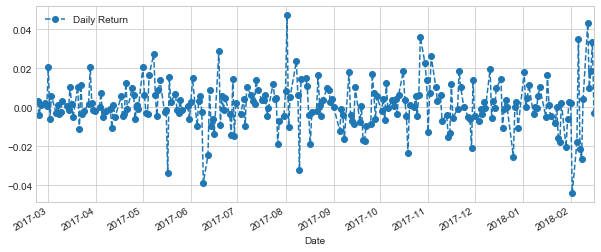

In [113]:
# pct_changeを使うと，変化の割合を計算できる。
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()
# 変化率をプロットしてみる。
AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

前日比(%)のヒストグラムを描く，seabornを使って，KDE plotも描く。

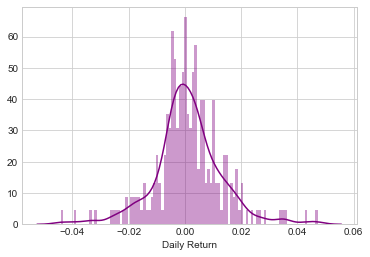

In [114]:
# NaN を取り除く
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

ハイテク企業4社の株価を1つのDFにまとめる。

In [115]:
d = {}
for v in tech_list:
    d[v] = getattr(eval(v), 'Adj. Close')
closing_df = pd.DataFrame(d, columns=tech_list)

# closing_df = data.DataReader( tech_list,
#                               data_source = 'yahoo',
#                               start = start,
#                               end = end) ['Adj Close']

# closing_df = web.get_data_google(['AAPL','GOOG','MSFT','AMZN'],start,end)['Close']

# closing_df = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)

In [116]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-02-21,135.592711,831.66,63.468654,856.44
2017-02-22,135.999390,830.76,63.340712,855.61
2017-02-23,135.424088,831.33,63.596595,852.19
2017-02-24,135.553035,828.64,63.596595,845.24
2017-02-27,135.820848,829.28,63.212771,848.64


In [117]:
# 別のDataFrameにしておく
tech_rets = closing_df.pct_change()

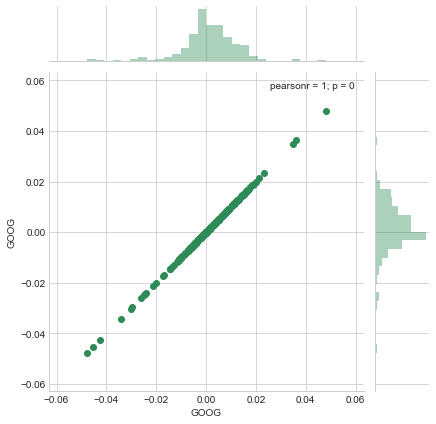

In [118]:
# Google同士なら，完全相関する
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

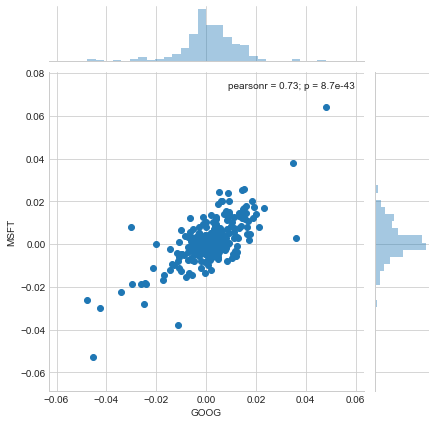

In [119]:
# 相関があるか，別の会社をで比較してみる
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0
相関係数について、感覚的な理解を助けてくれる図を紹介しておきます。

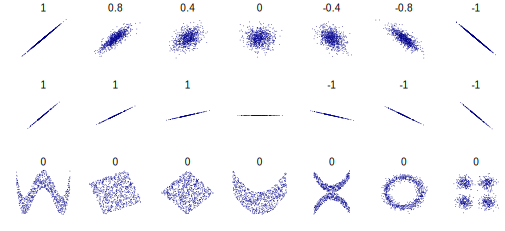

In [121]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

2社の比較は，seabornを使うとすべてのパターンについて用意に確認できる。
sns.pariplot()

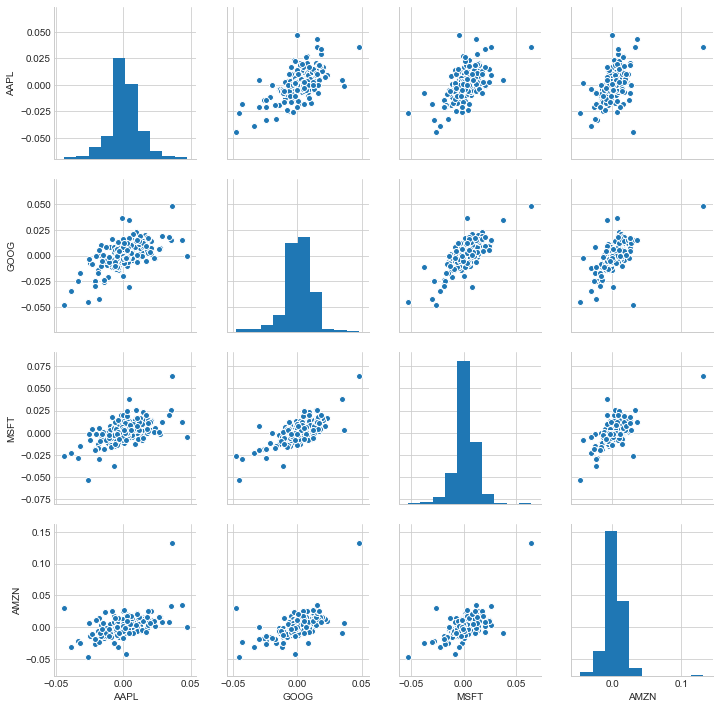

In [123]:
sns.pairplot(tech_rets.dropna())

すべてのパターンが一目瞭然。
PairGrid()を使うと，上下側でべつのしゅるいのグラフを描ける。

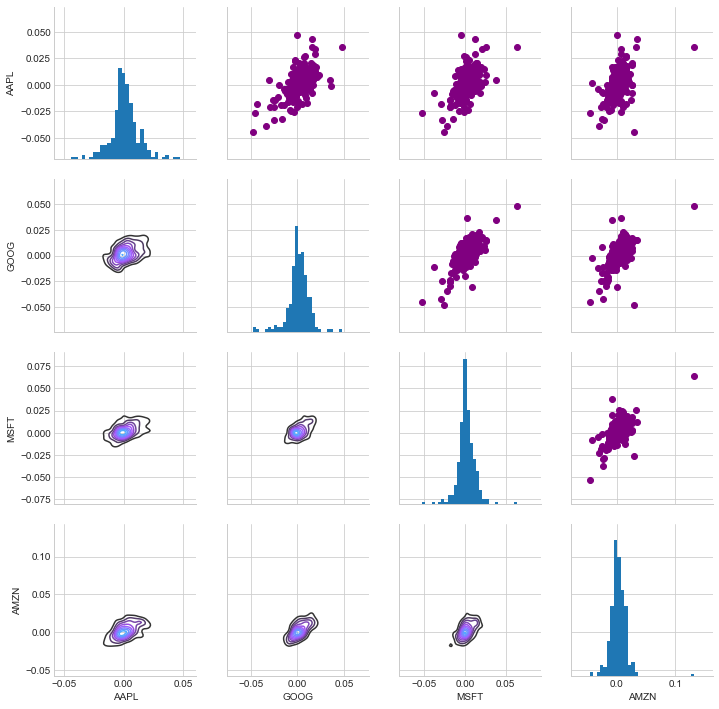

In [126]:
# DFを引数にして，PairGrid()を作る
returns_fig = sns.PairGrid(tech_rets.dropna())

# 右上側指定
returns_fig.map_upper(plt.scatter, color = 'purple')

# 右下指定
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# 対角線上には，ヒストグラムを描く
returns_fig.map_diag(plt.hist, bins = 30)

終値についても同様。

/Users/usui/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/usui/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/contour.py:1515: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


ValueError: zero-size array to reduction operation minimum which has no identity

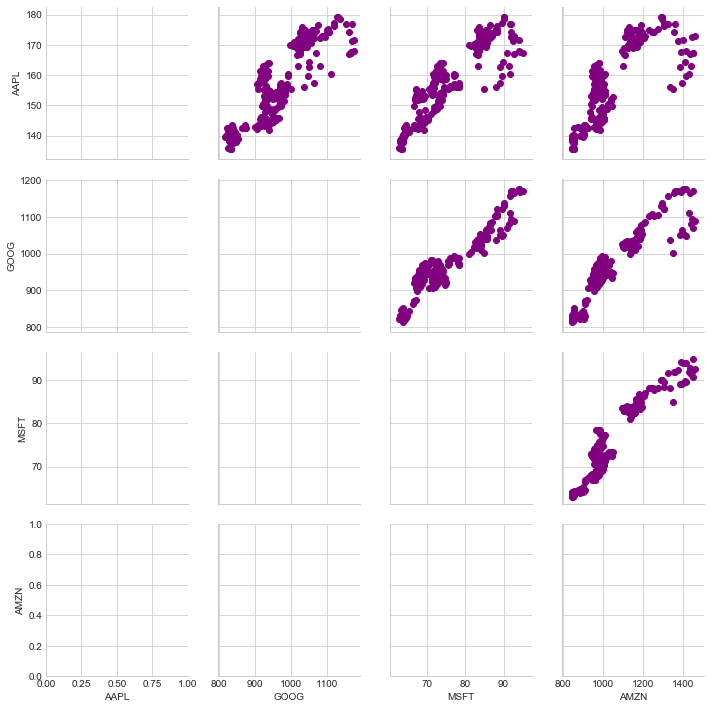

In [132]:
# この部分以外は同じ
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple') # 右上側指定
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d') # 右下指定
returns_fig.map_diag(plt.hist, bins = 30) # 対角線上には，ヒストグラムを描く

相関係数を表示したヒートマップを描くこともできます。

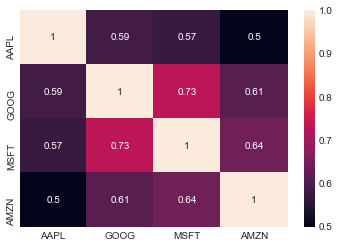

In [133]:
# 相関係数の数値が欲しい場合は，heatmapを使う
sns.heatmap(tech_rets.corr(), annot = True)